# Ultimate Data Science Challenge - Take Home Challenge

### Part 1 - Exploratory Data Analysis

Using the attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15-minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

#### Response

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# plot setting
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)})

In [4]:
# Reading in the logins.json file
login = pd.read_json('logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


The data contains a single column with just a timestamp of the login time.  The data type is already a datatime64 type so there's no need to convert datetime object.

We add a new column to count the login event.

In [6]:
login['login_count'] = 1
login

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
...,...,...
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1


We create a new dataframe to start aggregating login counts on 15 minute intervals.

In [7]:
login_15 = login.loc[:,['login_time', 'login_count']]
login_15

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
...,...,...
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1


We set the 'login-time' as the index and resample the time-series into 15 minute intervals.

In [8]:
login_15 = login_15.set_index('login_time').resample('15min').sum()   
login_15

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


Let's take a look at the most and least login count within a 15 minute intervals.

In [9]:
most_login = login_15.sort_values(by='login_count', ascending=False).head(20)
most_login

,login_count
login_time,
1970-03-01 04:30:00,73
1970-04-04 05:30:00,66
1970-04-04 01:30:00,64
1970-04-04 01:15:00,63
1970-04-01 23:30:00,60
1970-04-04 05:00:00,60
1970-04-04 04:45:00,59
1970-04-04 05:15:00,59
1970-04-04 01:45:00,56


In [10]:
least_login = login_15[login_15['login_count'] != 0].sort_values(by='login_count', ascending=False).tail(20)
least_login

,login_count
login_time,
1970-01-18 09:15:00,1
1970-01-18 09:00:00,1
1970-01-18 06:45:00,1
1970-03-11 09:15:00,1
1970-04-01 16:45:00,1
1970-03-11 08:15:00,1
1970-03-11 07:30:00,1
1970-03-11 06:45:00,1
1970-03-11 06:00:00,1


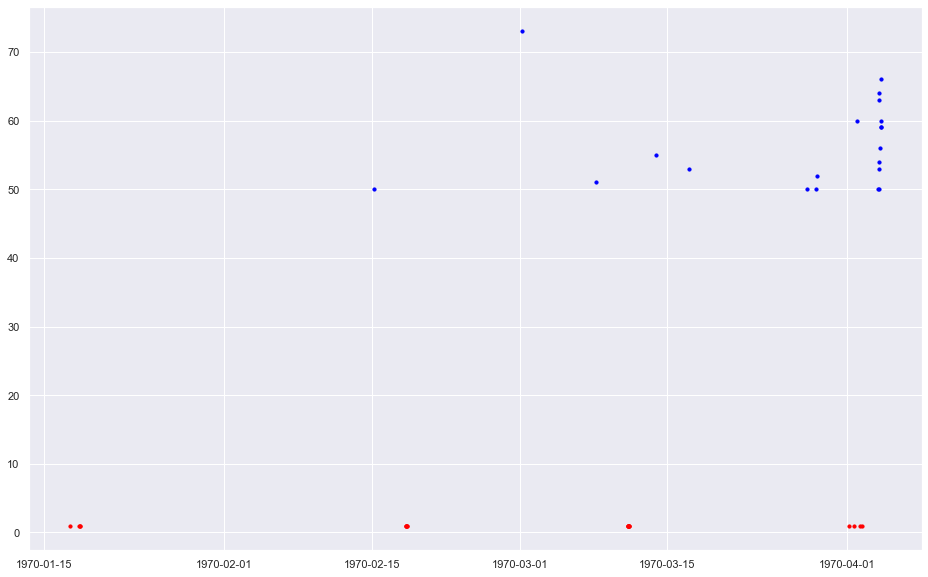

In [11]:
plt.scatter(most_login.index, most_login['login_count'], s=10, c='blue')
plt.scatter(least_login.index, least_login['login_count'], s=10, c='red')


The scatterplot doesn't show much information except the most login count within a 15 minute interval occurred in early March and there's a cluster of them occurring sometime after April.

Let's examine further with a lineplot.

Text(0.5, 1.0, 'Login Count from January Thru April')

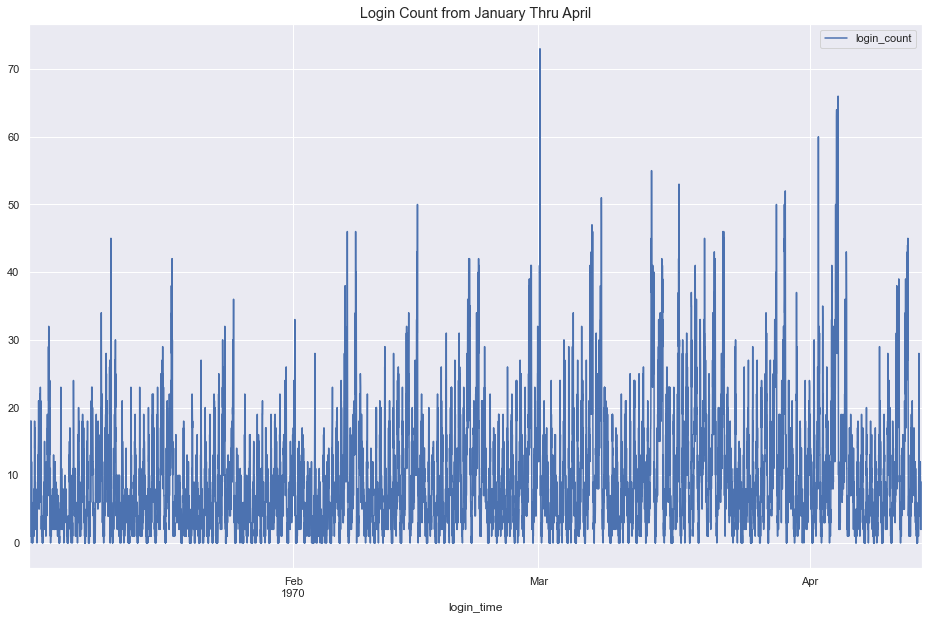

In [12]:
login_15.plot()
plt.title("Login Count from January Thru April", fontsize='large')

The plot is really dense, however, it appears that there are cycles in the login count.  It looks like there are 4 cycles a month or a weekly cycle. Let's zoom into a single month. 

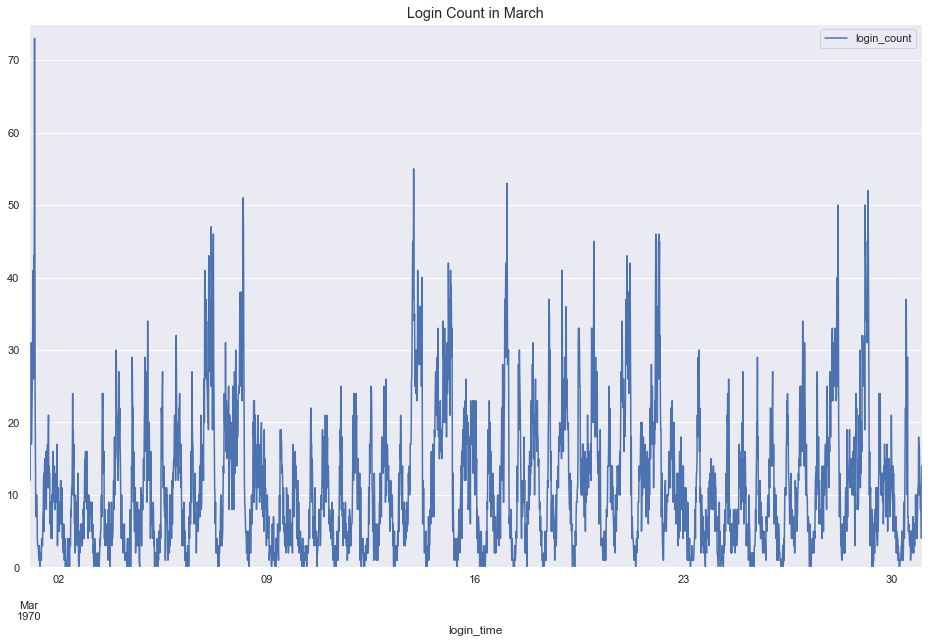

In [13]:
ax = login_15.plot()

plt.title("Login Count in March", fontsize='large')

ax.set_xlim(['1970-03-01', '1970-03-31'])
ax.set_ylim(0, 75)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

We can discern some pattern but still needs to zoom in further to see a clearer picture.

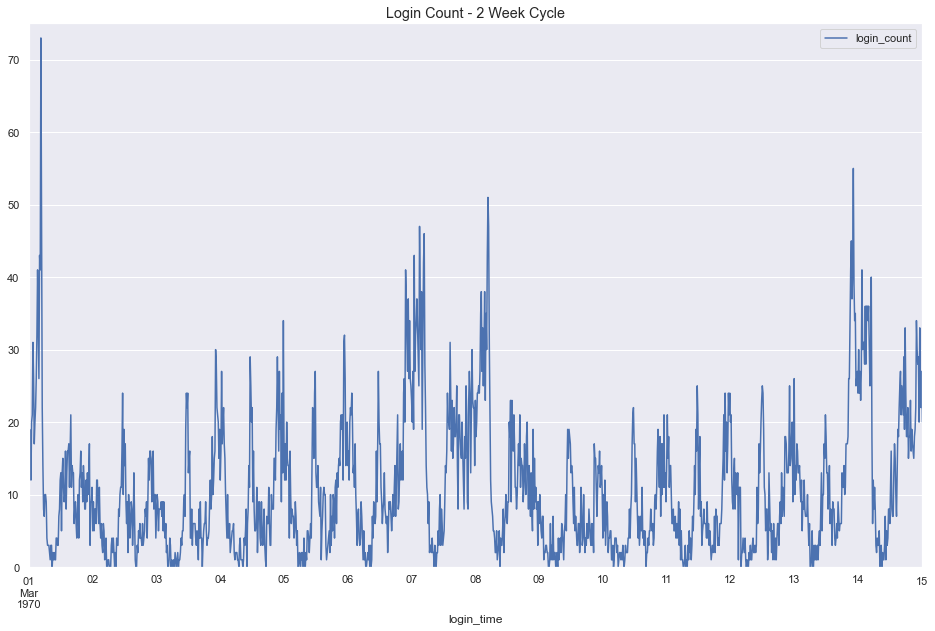

In [14]:
ax = login_15.plot()

plt.title("Login Count - 2 Week Cycle", fontsize='large')

ax.set_xlim(['1970-03-01', '1970-03-15'])
ax.set_ylim(0, 75)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

Here looking at a 2 week cycle we could discern 2 peaks and 2 dips in login cycle each day.  Let's zoom in further to see if we can see when it these peaks and dips occur each day.

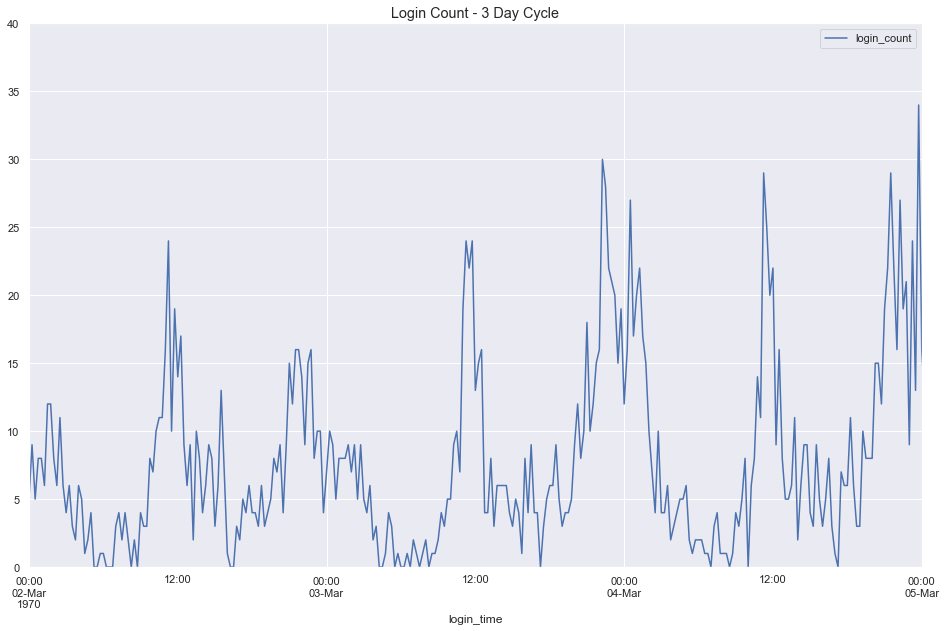

In [15]:
ax = login_15.plot()

plt.title("Login Count - 3 Day Cycle", fontsize='large')

ax.set_xlim(['1970-03-02', '1970-03-05'])
ax.set_ylim(0, 40)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

In this plot we could see a peak occurring around noon each day and around midnight and dips occurs in between.  Let's zoom into a single day.

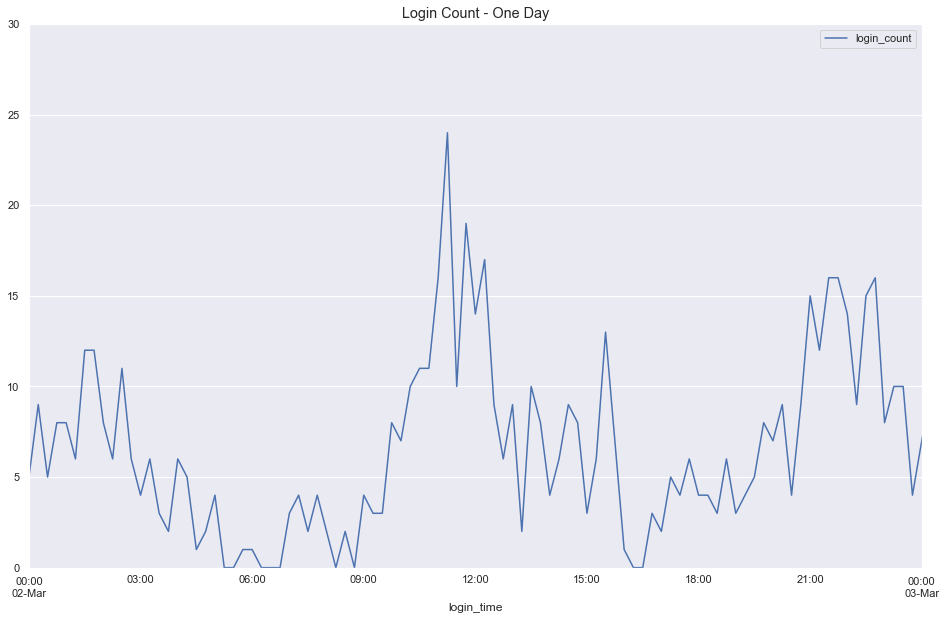

In [16]:
ax = login_15.plot()

plt.title("Login Count - One Day", fontsize='large')

ax.set_xlim(['1970-03-02', '1970-03-03'])
ax.set_ylim(0, 30)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

On this particular day, we see a steady dip from the night before to a low at 6am before it activity pick up and peak at noon.  Then dropping again until about 4pm and activity picks up until about 11pm.  

Let's take a look at boxplot of average activities on a weekly cycle.

Text(0.5, 1.0, 'Login Count - Weekly Cycle Boxplot')

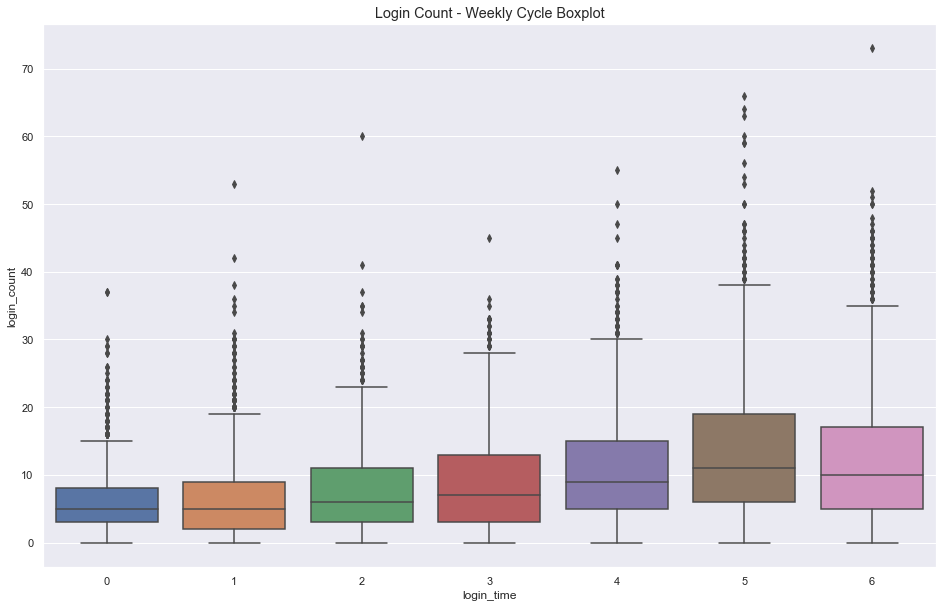

In [17]:
sns.boxplot(x=login_15.index.dayofweek, y=login_15['login_count']);

plt.title("Login Count - Weekly Cycle Boxplot", fontsize='large')

We see on average the peak logins in 15 minute intervals occur on Saturdays and goes down to a low on Mondays. 

Text(0.5, 1.0, 'Login Count - Daily Cycle Boxplot')

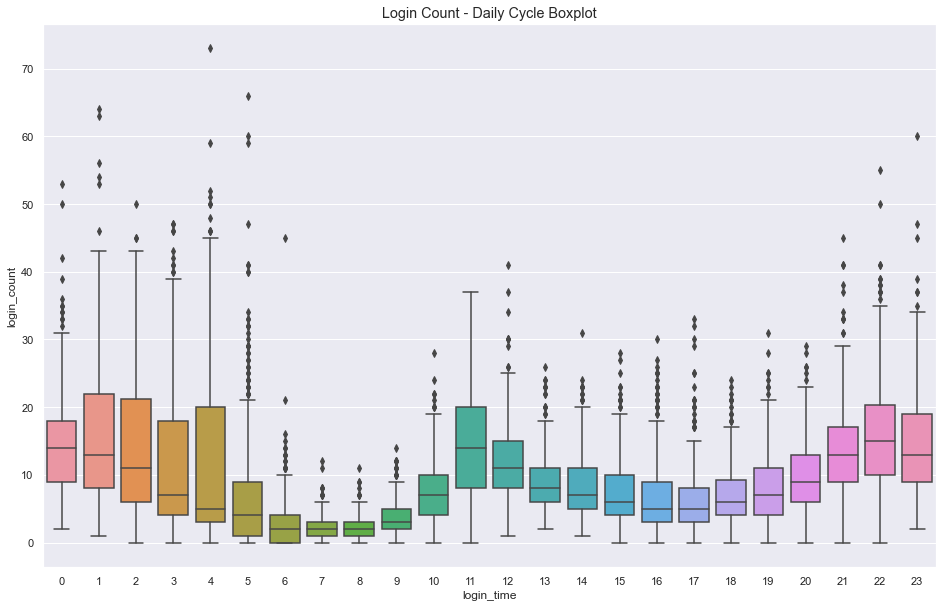

In [18]:
sns.boxplot(x=login_15.index.hour, y=login_15['login_count']);
plt.title("Login Count - Daily Cycle Boxplot", fontsize='large')

### Conclusion

We see that there is 2 peaks and 2 dips in login activities.  On average the logins peak at 11am and at 10pm each day.  Logins are lowest around 7am and 8am each day with another low point at around 4pm and 5pm.  The highest login occured at 4am one Sunday in March.  Saturdays get the most logins on average.  

### Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

    1. What would you choose as the key measure of success of this experiment in
    encouraging driver partners to serve both cities, and why would you choose this metric?
    
    2. Describe a practical experiment you would design to compare the effectiveness of the
    proposed change in relation to the key measure of success. Please provide details on:
    
        a. how you will implement the experiment
        b. what statistical test(s) you will conduct to verify the significance of the
        observation
        c. how you would interpret the results and provide recommendations to the city
        operations team along with any caveats.


#### Response

I would use data from drivers crossing the toll bridge from before the toll reimbursement experiment and compare with data of drivers crossing afterwards.  I would choose the weekend data because that's when both cities are concurrent activity in both cities.  

a. We would collect data from driver partners who are working that weekend along with their fast track actitivies during the weekends when they work. We would collect the same data after the toll reimbursement takes effect.  

b. If we take the mean frequency of drivers crossing the bridge before and and compare with the mean freqency of bridge crossing after the toll reimbursement period to see if there is any shift in the mean frequency of bridge crossing.

c. If we see that the mean freqency has increased after toll reimbursement was put into affect, we would interpret the experiment as having the expected result and recommend toll reimbursement program continue.  If, however, the mean frenquency of drivers crossing the bridge has not changed much or has decreased, we would recommend not implementing the toll reimbursement program.  A similar test could be done during the weekdays to see what pattern occurs and if toll reimbursement positively affects toll crossing.

### Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?


2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.


3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long-term rider retention (again, a few sentences will suffice).


#### Response

#### 1. Initial Exploratory Analysis and Visualization

In [19]:
# Reading in the logins.json file
ultimate = pd.read_json('ultimate_data_challenge.json')
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [20]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [21]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [22]:
ultimate.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

### Data description

    ● city: city this user signed up in
    ● phone: primary device for this user
    ● signup_date: date of account registration; in the form ‘YYYYMMDD’
    ● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
    ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    ● avg_rating_by_driver: the rider’s average rating over all of their trips
    ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    ● surge_pct: the percent of trips taken with surge multiplier > 1
    ● avg_surge: The average surge multiplier over all of this user’s trips
    ● trips_in_first_30_days: the number of trips this user took in the first 30 days after
    signing up
    ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
    FALSE otherwise
    ● weekday_pct: the percent of the user’s trips occurring during a weekday -->

In [23]:
# Importing datetime to work with timeseries
import datetime as dt

In [24]:
# Converting 'signup-date' and 'last_trip_date' to datetime object
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'])
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])

In [25]:
ultimate['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [26]:
# Creating an 'active' column with '1' for users still active June 1st and afterwards, these will be our target
ultimate['active'] = np.where(ultimate['last_trip_date'] >= '2014-06-01', 'yes', 'no')
ultimate

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,yes
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,no
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,no
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,yes
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,yes
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,no
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,no
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,no


<AxesSubplot:xlabel='active', ylabel='count'>

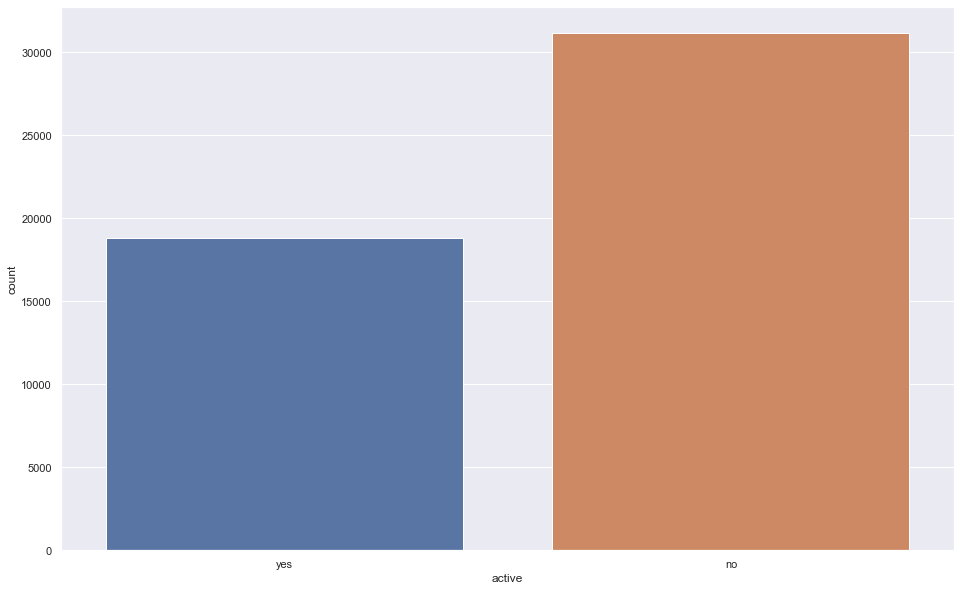

In [27]:
sns.countplot(ultimate['active'])

In [28]:
#What percentage of customers are leaving ?
retained = ultimate[ultimate.active == 'yes']
churned = ultimate[ultimate.active == 'no']
num_retained = retained.shape[0]
num_churned = churned.shape[0]

#Print the percentage of customers that stayed and left
print( round(num_retained / (num_retained + num_churned) * 100) , "% of customers stayed with the company.")

#Print the percentage of customers that stayed and left
print( round(num_churned / (num_retained + num_churned) * 100),"% of customers left the company.")


38 % of customers stayed with the company.
62 % of customers left the company.


#### We see that Ultimate has a 38% retention rate and a 62% churn rate

We use Seaborn Pairplot to see if there are correlation between any of the variables

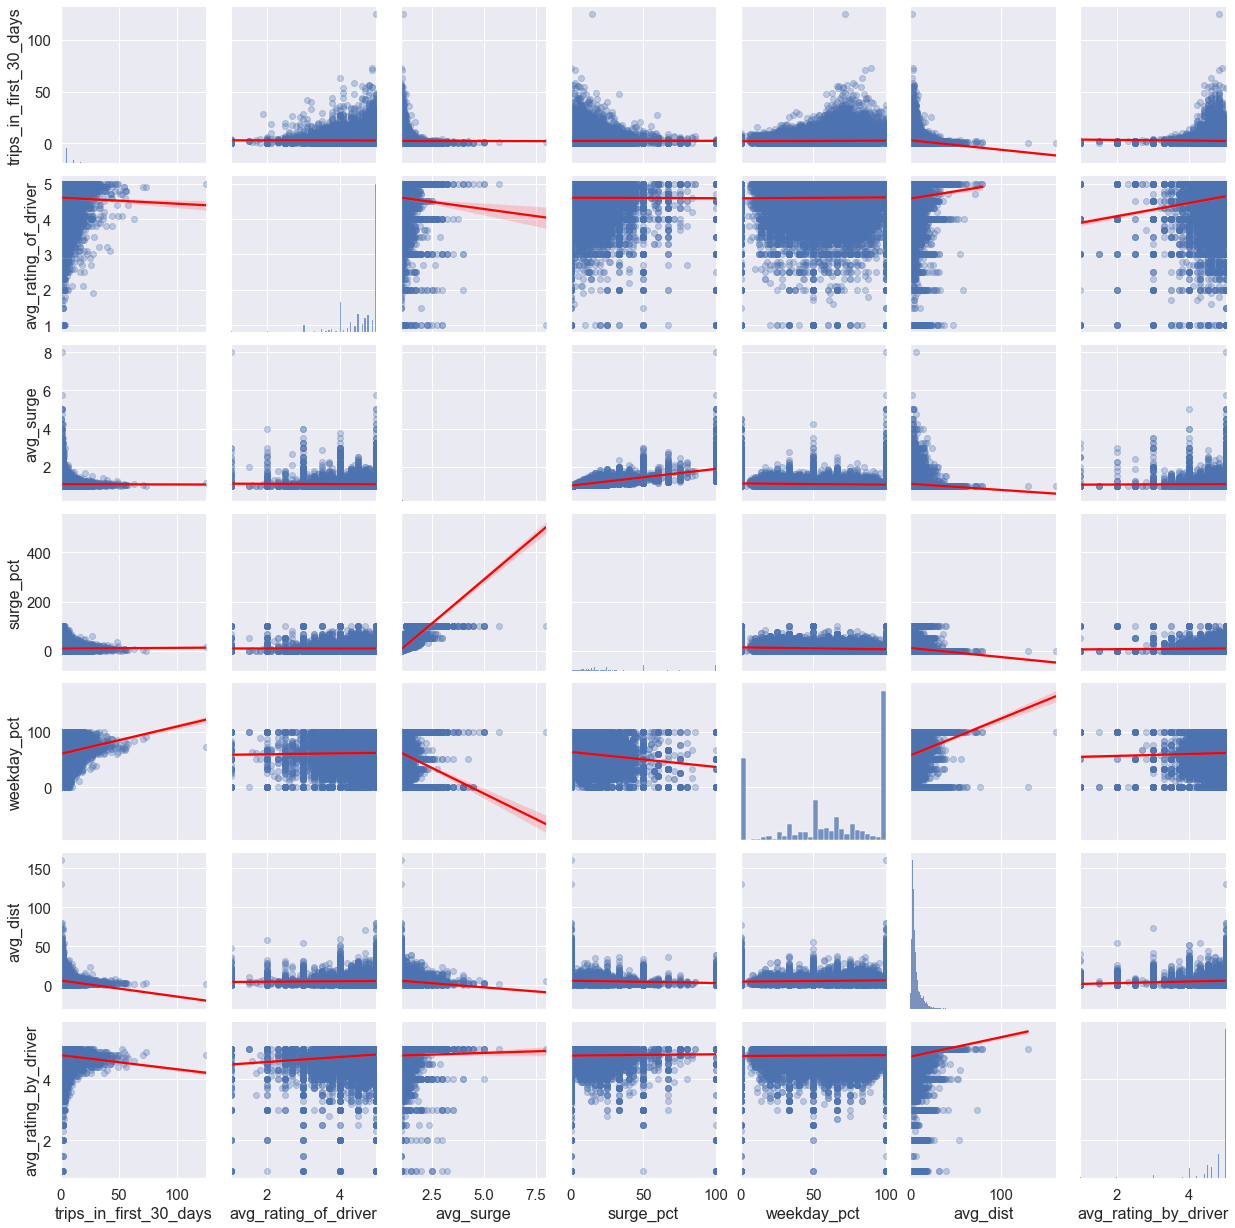

In [29]:
sns.set(font_scale=1.35)

data = ultimate[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver']]

sns.pairplot(data, kind="reg", aspect=16/16, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})
plt.show()

We see that average surge price is negatively correlated with average rating of drivers - which makes sense.  People are not too happy about paying surge price.  Also average surge price is negatively correlated with weekday percent usage as well as distance.  These tend to be more weekend users and not out for a long ride. However, it seems there's a positive correlation with average distance and average rating of drivers.  And these are also seemed to be more weekday riders, which is interesting.  It seems to indicate that weekday riders, most likely people who use the ride for business or work related purposes tend to be more positive towards the drivers.  

#### Now let's take a look at how different factors affected churn rate 

1. Where users signed up from

<AxesSubplot:xlabel='city', ylabel='count'>

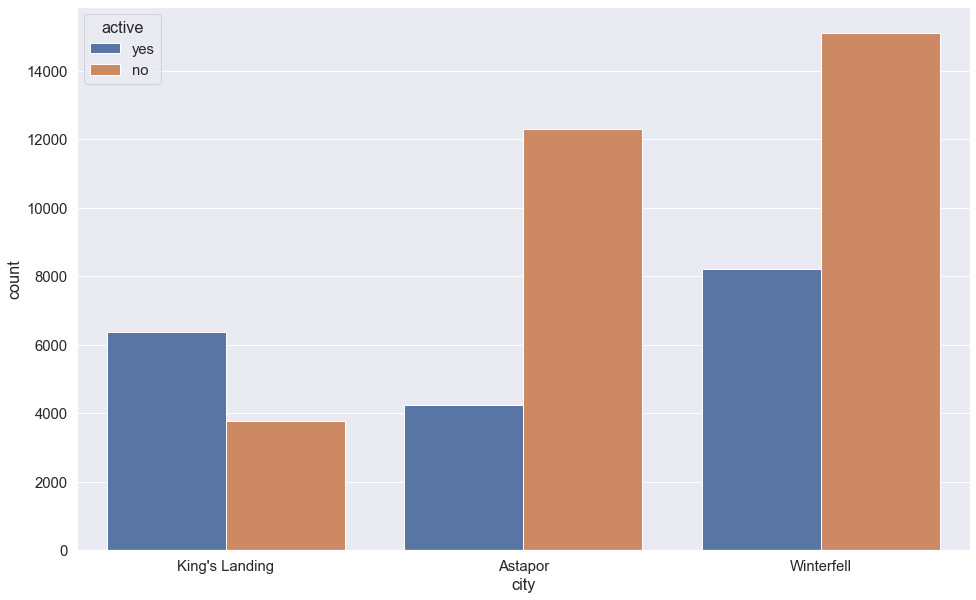

In [30]:
#Visualize the churn count for city user signed up in
sns.countplot(x='city', hue='active', data = ultimate)

Interestingly users signed up at King's Landing have the best retention rate.

2.  Average Distance of Ride

<AxesSubplot:xlabel='avg_dist_rd', ylabel='count'>

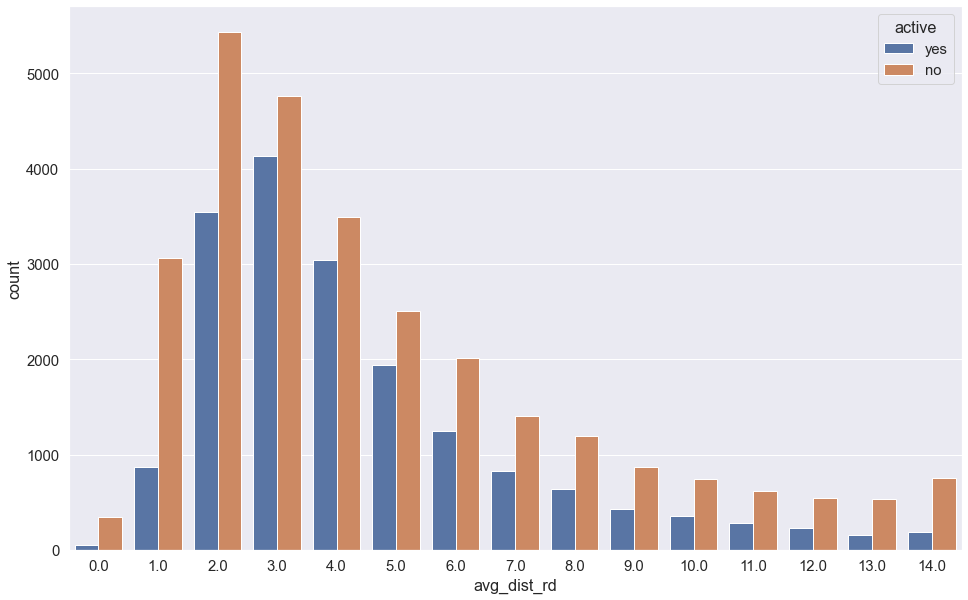

In [31]:
#Visualize the churn count for city user signed up in
ultimate['avg_dist_rd'] = round(ultimate['avg_dist'])
ultimate2 = ultimate[ultimate['avg_dist_rd'] < 15]
sns.countplot(x='avg_dist_rd', hue='active', data = ultimate2)

Retention rate seems to fare much better between 2 and 5 miles distance riders.  

3.  Weekday Percent Riders

<AxesSubplot:xlabel='weekday_pct_rd10', ylabel='count'>

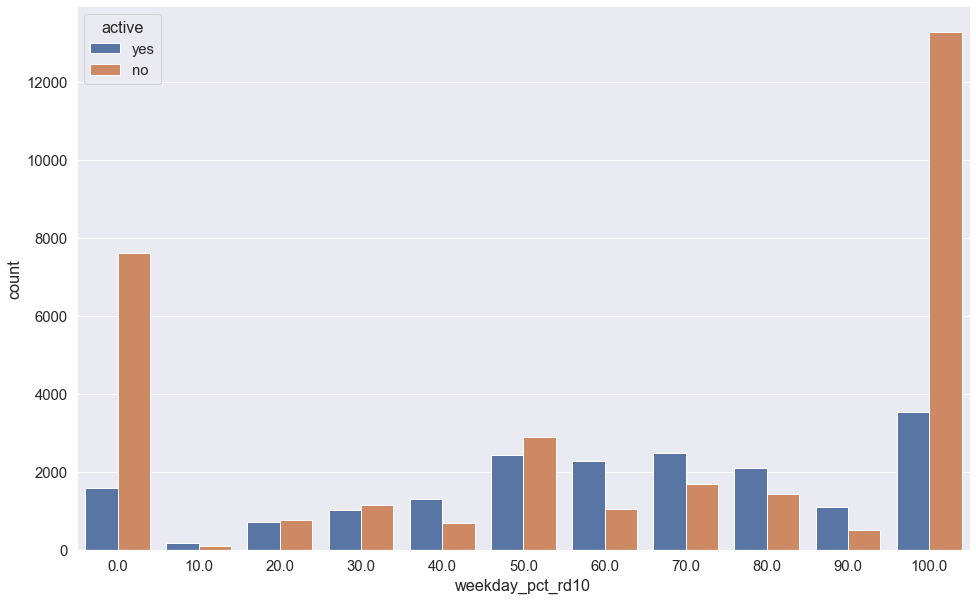

In [32]:
#Visualize the churn count on weekday percent use
ultimate['weekday_pct_rd10'] = round(ultimate['weekday_pct']/10)*10
sns.countplot(x='weekday_pct_rd10', hue='active', data = ultimate)

Churn rate is high for those who are either 0 or 100% weekday riders.  Retention rates are better for those who are both weekend and weekday users.  Those who are range between 60-90% weekday riders have the best retention rates. 

4.  Number of Trips within the 1st 30 days

<AxesSubplot:xlabel='trips_in_first_30_days', ylabel='count'>

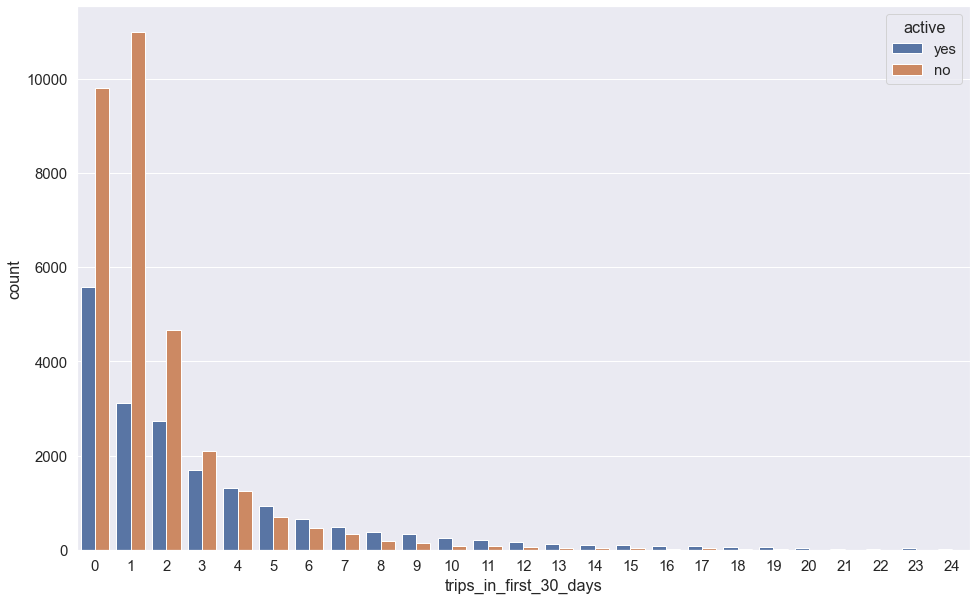

In [33]:
#Visualize the churn count on number of trips in 1st 30 days
ultimate2 = ultimate[ultimate['trips_in_first_30_days'] < 25]
sns.countplot(x='trips_in_first_30_days', hue='active', data = ultimate2)

Retention rates are best for those who ride 3 or less times within the 1st 30 days. 

5.  Surge Percentage

<AxesSubplot:xlabel='surge_pct5', ylabel='count'>

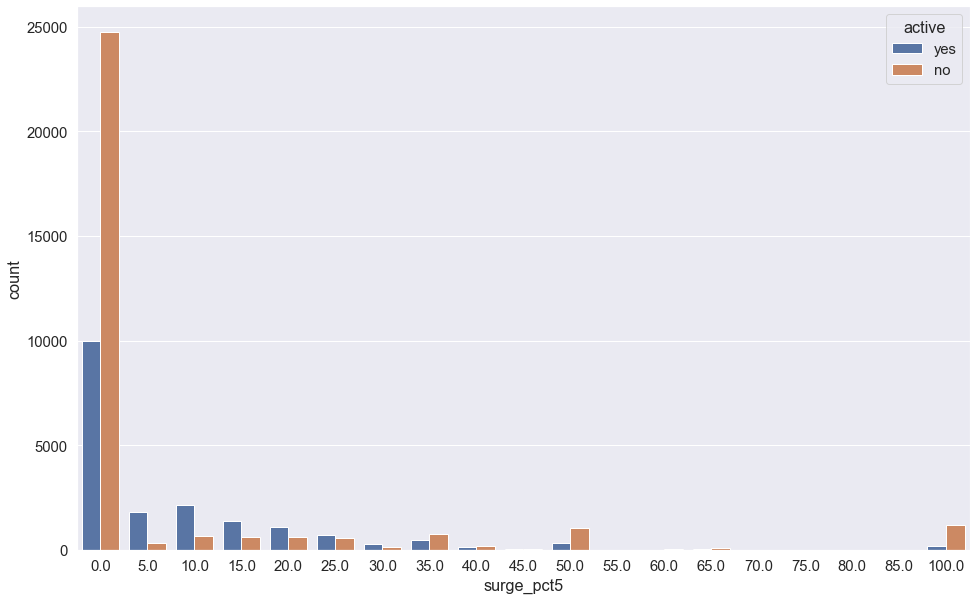

In [34]:
#Visualize the churn count on percent surge rate
ultimate['surge_pct5'] = round(ultimate['surge_pct']/5)*5
sns.countplot(x='surge_pct5', hue='active', data = ultimate)

Retention is highest among those who don't experience surge rate.  Except for pockets of retention at 35, 50 & 100%, in general, surge percentage contributes to churn rate.

6.  Average Rating by Driver

<AxesSubplot:xlabel='avg_rating_by_driver_rd', ylabel='count'>

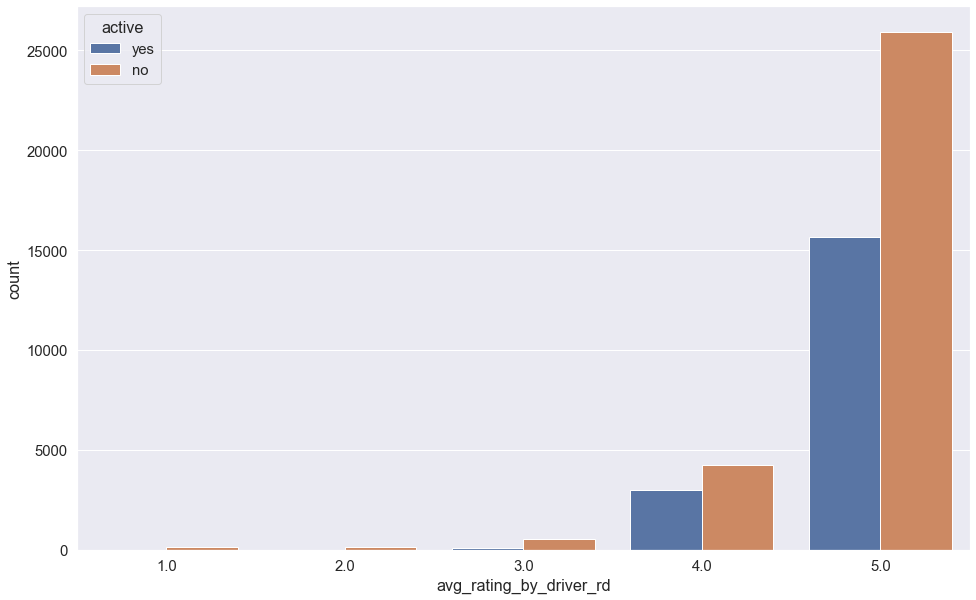

In [35]:
#Visualize the churn count on rating by drivers
ultimate['avg_rating_by_driver_rd'] = round(ultimate['avg_rating_by_driver'])
sns.countplot(x='avg_rating_by_driver_rd', hue='active', data = ultimate)

Rating scores given by drivers don't seem to affect retention or churn rate much.  Lastly, let's take a look at:

7.  Average Rating of Driver

<AxesSubplot:xlabel='avg_rating_of_driver_rd', ylabel='count'>

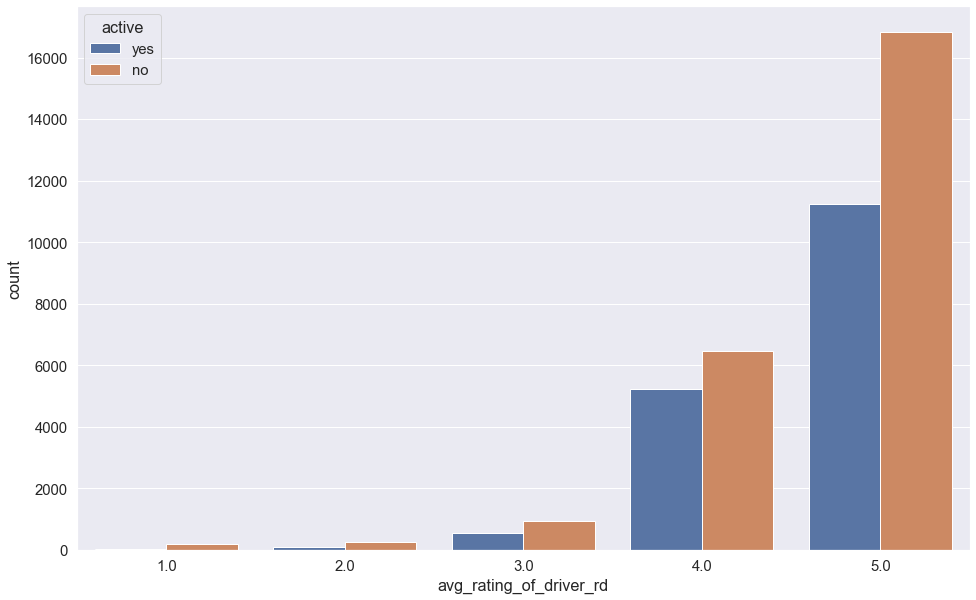

In [36]:
#Visualize the churn count on rating of drivers
ultimate['avg_rating_of_driver_rd'] = round(ultimate['avg_rating_of_driver'])
sns.countplot(x='avg_rating_of_driver_rd', hue='active', data = ultimate)

Here too, rating scores given to drivers don't seem to affect retention or churn rate much.  

Let's take apply machine learning models to predict customer retention and churn rate.

#### 2. Applying ML Models

This is a classification problem and I want to compare Random Forest and SVM classifiers.  Both are very effective classifiers for both classification and regression problems.  

In [37]:
# importing in our modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC

In [38]:
#converting date to months to prep for machine learning
ultimate['last_trip_month'] = ultimate['last_trip_date'].dt.month 
ultimate['signup_month'] = ultimate['signup_date'].dt.month
ultimate

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,avg_dist_rd,weekday_pct_rd10,surge_pct5,avg_rating_by_driver_rd,avg_rating_of_driver_rd,last_trip_month,signup_month
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,yes,4.0,50.0,15.0,5.0,5.0,6,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,no,8.0,50.0,0.0,5.0,5.0,5,1
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,no,1.0,100.0,0.0,5.0,4.0,1,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,yes,2.0,80.0,20.0,5.0,5.0,6,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,no,3.0,80.0,10.0,5.0,4.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,yes,6.0,100.0,0.0,4.0,5.0,6,1
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,no,0.0,0.0,0.0,4.0,NaN,1,1
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,no,4.0,100.0,0.0,5.0,5.0,5,1
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,no,5.0,100.0,0.0,4.0,3.0,1,1


In [39]:
# encoding all variables with 2 classes
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for x in [i for i in ultimate.columns if len(ultimate[i].unique())==2]:
    print(x, ultimate[x].unique())
    ultimate[x]= label_encoder.fit_transform(ultimate[x])

ultimate_black_user [ True False]
active ['yes' 'no']


In [40]:
# encoding variables with more than 2 classes with dummy variables
ultimate = pd.get_dummies(ultimate, columns= [i for i in ultimate.columns if ultimate[i].dtypes=='object'],drop_first=True)
[[x, ultimate[x].unique()] for x in [i for i in ultimate.columns if len(ultimate[i].unique())<10]]

[['ultimate_black_user', array([1, 0], dtype=int64)],
 ['active', array([1, 0])],
 ['avg_rating_by_driver_rd', array([ 5.,  4.,  3., nan,  2.,  1.])],
 ['avg_rating_of_driver_rd', array([ 5.,  4., nan,  2.,  1.,  3.])],
 ['last_trip_month', array([6, 5, 1, 3, 2, 7, 4], dtype=int64)],
 ['signup_month', array([1], dtype=int64)],
 ["city_King's Landing", array([1, 0], dtype=uint8)],
 ['city_Winterfell', array([0, 1], dtype=uint8)],
 ['phone_iPhone', array([1, 0], dtype=uint8)]]

In [41]:
# taking a look at our data 
ultimate.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,...,avg_dist_rd,weekday_pct_rd10,surge_pct5,avg_rating_by_driver_rd,avg_rating_of_driver_rd,last_trip_month,signup_month,city_King's Landing,city_Winterfell,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,...,4.0,50.0,15.0,5.0,5.0,6,1,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,...,8.0,50.0,0.0,5.0,5.0,5,1,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,...,1.0,100.0,0.0,5.0,4.0,1,1,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,...,2.0,80.0,20.0,5.0,5.0,6,1,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,...,3.0,80.0,10.0,5.0,4.0,3,1,0,1,0


In [42]:
# checking for null values
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trips_in_first_30_days   50000 non-null  int64         
 1   signup_date              50000 non-null  datetime64[ns]
 2   avg_rating_of_driver     41878 non-null  float64       
 3   avg_surge                50000 non-null  float64       
 4   last_trip_date           50000 non-null  datetime64[ns]
 5   surge_pct                50000 non-null  float64       
 6   ultimate_black_user      50000 non-null  int64         
 7   weekday_pct              50000 non-null  float64       
 8   avg_dist                 50000 non-null  float64       
 9   avg_rating_by_driver     49799 non-null  float64       
 10  active                   50000 non-null  int32         
 11  avg_dist_rd              50000 non-null  float64       
 12  weekday_pct_rd10         50000 n

In [43]:
# getting rid of null values
ultimate.dropna(inplace=True)
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trips_in_first_30_days   41744 non-null  int64         
 1   signup_date              41744 non-null  datetime64[ns]
 2   avg_rating_of_driver     41744 non-null  float64       
 3   avg_surge                41744 non-null  float64       
 4   last_trip_date           41744 non-null  datetime64[ns]
 5   surge_pct                41744 non-null  float64       
 6   ultimate_black_user      41744 non-null  int64         
 7   weekday_pct              41744 non-null  float64       
 8   avg_dist                 41744 non-null  float64       
 9   avg_rating_by_driver     41744 non-null  float64       
 10  active                   41744 non-null  int32         
 11  avg_dist_rd              41744 non-null  float64       
 12  weekday_pct_rd10         41744 n

In [44]:
# Create Features DataFrame and splitting our data into training and test sets
X=ultimate.drop(['last_trip_month', 'signup_date', 'last_trip_date', 'active'],axis=1)
# Create Target Series
y=ultimate['active']
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [45]:
# Scaling our variables
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=sc.transform(X_test)

In [46]:
X_train.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,avg_dist_rd,weekday_pct_rd10,surge_pct5,avg_rating_by_driver_rd,avg_rating_of_driver_rd,signup_month,city_King's Landing,city_Winterfell,phone_iPhone
0,-0.396756,0.645688,-0.375861,-0.484008,-0.790808,1.112336,6.596505,0.548427,6.659659,1.101336,-0.482893,0.409407,0.607880,0.0,1.934492,-0.931127,0.650759
1,-0.149358,-0.164266,-0.375861,-0.484008,1.264530,1.112336,0.128373,-1.410184,0.101051,1.101336,-0.482893,-1.708006,-0.907735,0.0,1.934492,-0.931127,0.650759
2,-0.149358,0.645688,-0.375861,-0.484008,1.264530,1.112336,-0.905214,0.548427,-0.863450,1.101336,-0.482893,0.409407,0.607880,0.0,-0.516931,1.073967,0.650759
3,0.345440,0.645688,-0.375861,-0.484008,1.264530,1.112336,0.590107,-0.920531,0.679752,1.101336,-0.482893,-1.708006,0.607880,0.0,-0.516931,-0.931127,0.650759
4,-0.644155,0.645688,-0.375861,-0.484008,-0.790808,0.753233,-0.829868,0.058774,-0.863450,0.816483,-0.482893,0.409407,0.607880,0.0,-0.516931,-0.931127,0.650759


#### Applying Random Forest Classifier 

In [47]:
#Apply RandomForest Classifier
random_classifier= RandomForestClassifier()
random_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred = random_classifier.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      4872
           1       0.71      0.69      0.70      3477

    accuracy                           0.75      8349
   macro avg       0.74      0.74      0.74      8349
weighted avg       0.75      0.75      0.75      8349



Text(291.09999999999997, 0.5, 'Predicted')

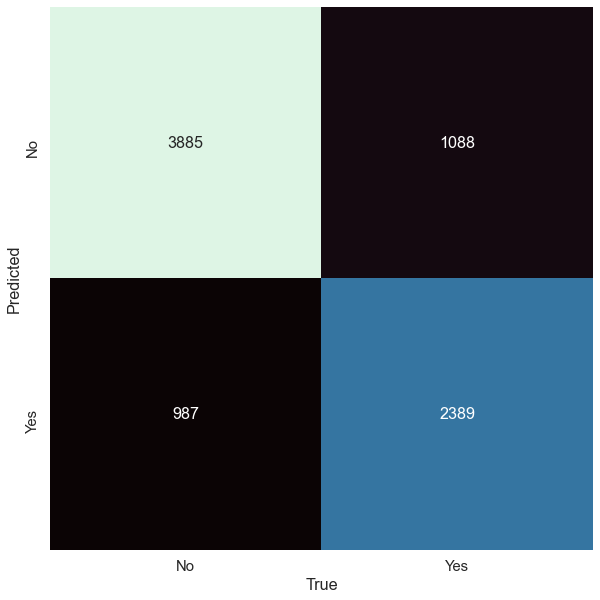

In [50]:
#Confusion Matrix
cmap='mako'
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'],
          cmap=cmap)
plt.xlabel('True')
plt.ylabel('Predicted')

#### Our model has a 71% precision, 69% recall and 75% accuracy.  Not too bad, let's look at the SVM classifier to compare.

#### Applying SVM Classifier

In [51]:
svm_classifier= SVC(probability=True)
svm_classifier.fit(X_train,y_train)

SVC(probability=True)

In [52]:
# Predict
y_pred_svm= svm_classifier.predict(X_test)
#Classification Report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81      4872
           1       0.75      0.65      0.69      3477

    accuracy                           0.76      8349
   macro avg       0.76      0.75      0.75      8349
weighted avg       0.76      0.76      0.76      8349



Text(291.09999999999997, 0.5, 'Predicted')

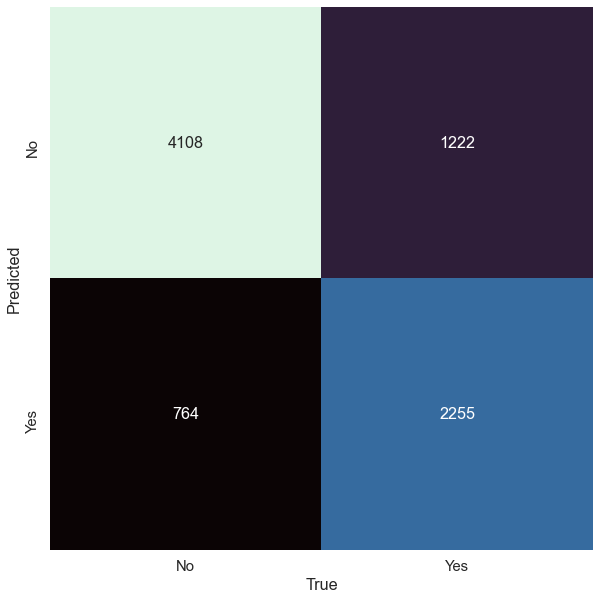

In [53]:
#Confusion Matrix
mat_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat_svm.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'], 
          cmap=cmap)
plt.xlabel('True')
plt.ylabel('Predicted')

#### The SVM classifier has a 75% precision, 65% recall and 76% accuracy.  It has less false positive but more false negative predictions than the Random Forest classifier.

Now let's compare the ROC curve for both model.  

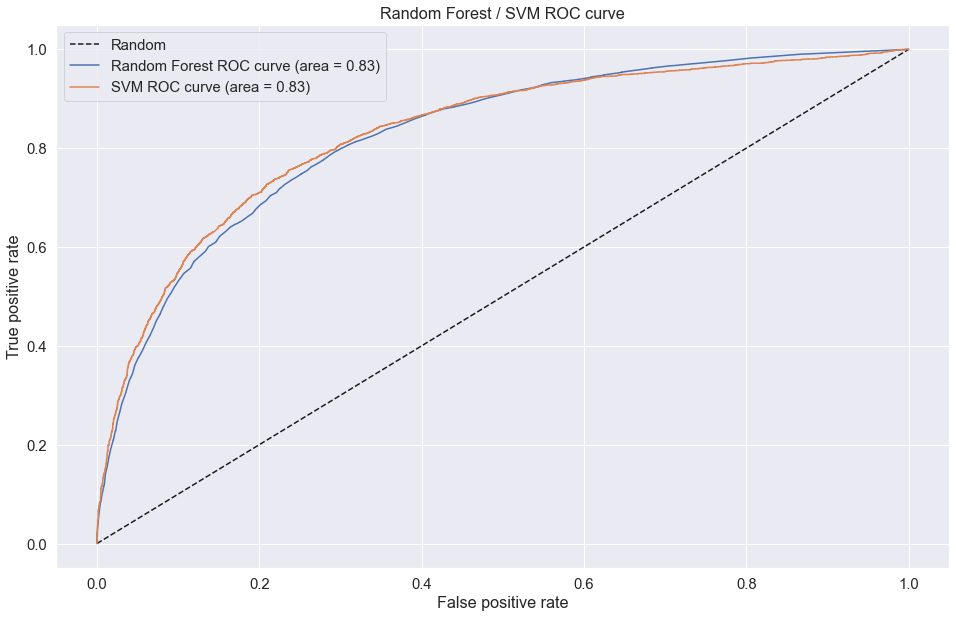

In [54]:
#Random Forest ROC
y_pred_proba=random_classifier.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_rf=auc(fpr,tpr)

#SVM ROC
y_pred_svm_proba=svm_classifier.predict_proba(X_test)[:,1]

#ROC Curve
fpr_svm, tpr_svm, _svm = roc_curve(y_test, y_pred_svm_proba)
roc_auc_svm=auc(fpr_svm,tpr_svm)

#Draw ROC using fpr, tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='Random Forest ROC curve (area = %0.2f)' %roc_auc_rf)
plt.plot(fpr_svm,tpr_svm,label='SVM ROC curve (area = %0.2f)' %roc_auc_svm)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest / SVM ROC curve')
plt.legend(loc='best')

When we compare the ROC curve for both model we see that they are pretty close in performance (SVM looks slightly better but not by much) - and both has AUC of 83%.  The SMV is computationally heavier than Random Forest, plus it has a higher false negative rate makes the Random Forest more preferred model for this problem.  

Lastly, let's take a look at the most important variables in predicting client churn / retention.

<AxesSubplot:>

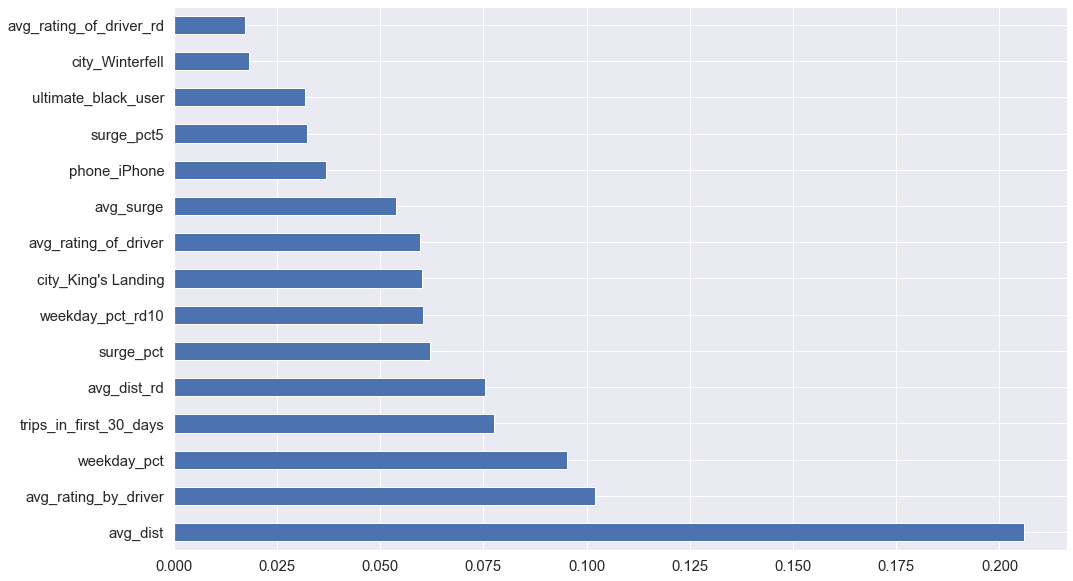

In [55]:
#get features importances
feat_importances = pd.Series(random_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

We see that the most important feature in predicting client churn / retention rate is average ride distance, followed by average rating by driver, weekday percent rides and number of trips within the first 30 days.  

#### 3. Observationss and Recommendations

We can use our models to predict whether a client will churn and can pay attention to those who are likely to churn.  The feature importance can help improve retention across those features:  

Since average distance is the highest feature predicting retention, let's take a closer look at it.  We saw that retention rate seems to fare much better between 2 and 5 miles distance riders. While we can't force clients only to take rides in that distance range we could try to figure out what are the charactoristics or motivations of riders within those range and we can build in more of those motivations with a specific campaign.

Nest, we saw that retention rates are best for those who ride 3 or less times within the 1st 30 days.  Retention rates are better for those who are not strictly weekday or weekend only users but uses the service on both weekends and weekdays.  We can either prime clients to get the ride service before they need to use the service and also encourage usage on both weekends and weekdays, especially to those who are exclusively weekend or weekday users.

Lastly, surge percentage contributes to churn rate - if churn rate proves to be too high, for a period of time, remove churn rate and retention rate should rise for that period.  